In [122]:
# import the normal packages
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# additional stuff that will help us later on
import requests

In [163]:
import os
import urllib.request

In [136]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [164]:
urls = pd.read_csv('https://raw.githubusercontent.com/statsbylopez/BlogPosts/master/nfl_teamlogos.csv')
for i in range(0,len(urls)):
    urllib.request.urlretrieve(urls['url'].iloc[i], os.getcwd() + '\\Logos\\' + urls['team'].iloc[i] + '.png')

In [166]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

In [ ]:
logos = os.listdir(os.getcwd() + '\\FOLDER')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '\\FOLDER\\' + str(i))

In [123]:
df = nfl.load_pbp_data(2021)
df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49470,4496,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,DAL,home,SF,...,1,0,0.350600,0.286266,3.663947,2.0,0.999042,0.391675,0.996538,0.346160
49471,4525,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,NaN,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49472,4548,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,DAL,home,SF,...,0,0,0.557666,NaN,NaN,NaN,NaN,NaN,0.988181,-98.818052
49473,4584,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,DAL,home,SF,...,0,0,-1.875698,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#To get early down run rate
#get all plays that are 1st and 2nd down
#group by team
#count all of these current rows
#create a new variable of sum of each teams rush counts over total column counts (Called early down rush %)

In [124]:
df_early = df.loc[(df['down']==1)|(df['down']==2)]

In [125]:
df_early['play'] = 1
df_early

/var/folders/0p/1_l8qlts6zlf1414_kt1f9lm0000gn/T/ipykernel_15405/190260617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_early['play'] = 1


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
8,218,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-0.511090,1.036891,10.339405,9.0,0.478471,0.079696,0.684949,31.505138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49468,4427,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,DAL,home,SF,...,1,0,0.398664,0.187043,3.930267,2.0,0.999046,0.967908,0.993262,0.673753
49469,4467,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,DAL,home,SF,...,1,0,0.344414,0.532845,10.453247,9.0,0.608015,0.246420,0.995801,0.419921
49470,4496,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,DAL,home,SF,...,1,0,0.350600,0.286266,3.663947,2.0,0.999042,0.391675,0.996538,0.346160
49472,4548,2021_19_SF_DAL,2022011602,DAL,SF,POST,19,DAL,home,SF,...,0,0,0.557666,NaN,NaN,NaN,NaN,NaN,0.988181,-98.818052


In [126]:
#df_run = df.loc[(df['rush'] == 1)]
df_run = df_early[['posteam', 'down','rusher_player_name', 'rusher_player_id', 'rushing_yards', 'rush', 'play']]

In [127]:
df = df_run.groupby(['posteam'], as_index=False).agg({'rush': ['sum'],'play':['sum']})
df['rate'] = df['rush']/df['play']
df = df.round(2)

In [128]:
df2 = nfl.load_pbp_data(2021)

In [129]:
df2[["posteam", "defteam", "pass", "rush", "epa", 'week']].head()

,posteam,defteam,pass,rush,epa,week
0,NaN,NaN,0,0,NaN,1
1,TEN,ARI,0,0,0.000000,1
2,TEN,ARI,0,1,-1.399805,1
3,TEN,ARI,1,0,0.032412,1
4,TEN,ARI,1,0,-1.532898,1


In [130]:
df2 = df2.groupby('posteam')[['epa']].mean().sort_values(by='epa', ascending=False)
df2

,epa
posteam,
KC,0.115459
GB,0.087398
TB,0.077287
BUF,0.073920
LA,0.052866
SF,0.045069
NE,0.043025
LAC,0.042011
DAL,0.041554


In [131]:
df3 = df2.merge(df[['posteam','rush','play', 'rate']], on='posteam')
df3


/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,posteam,epa,"(rush, sum)","(play, sum)","(rate, )"
0,KC,0.115459,351,1018,0.34
1,GB,0.087398,377,887,0.43
2,TB,0.077287,356,1008,0.35
3,BUF,0.073920,373,1000,0.37
4,LA,0.052866,374,913,0.41
5,SF,0.045069,456,930,0.49
6,NE,0.043025,428,929,0.46
7,LAC,0.042011,345,927,0.37
8,DAL,0.041554,400,1016,0.39
9,IND,0.039431,402,879,0.46


In [132]:
df3 = df3.rename(columns={'(rush,sum)':'rushes', '(play,sum)':'plays', '(rate,)':'rush_rate' })

In [133]:
df3.columns = ['posteam','epa', 'rushes', 'plays', 'rush_rate']

In [134]:
team_logo_colors = nfl.load_team_logo_data()
df3 = df3.merge(team_logo_colors[['team_abbr', 'team_color']].rename(columns={'team_abbr': 'posteam'}), on='posteam')
logos = pd.read_csv("https://raw.githubusercontent.com/leesharpe/nfldata/master/data/logos.csv")
df3 = df3.merge(logos[['team_logo', 'team']].rename(columns={'team': 'posteam'}), on='posteam')


df3

,posteam,epa,rushes,plays,rush_rate,team_color,team_logo
0,KC,0.115459,351,1018,0.34,#E31837,https://upload.wikimedia.org/wikipedia/en/thum...
1,GB,0.087398,377,887,0.43,#203731,https://upload.wikimedia.org/wikipedia/commons...
2,TB,0.077287,356,1008,0.35,#A71930,https://upload.wikimedia.org/wikipedia/en/thum...
3,BUF,0.073920,373,1000,0.37,#00338D,https://upload.wikimedia.org/wikipedia/en/thum...
4,LA,0.052866,374,913,0.41,#003594,https://upload.wikimedia.org/wikipedia/en/thum...
5,SF,0.045069,456,930,0.49,#AA0000,https://upload.wikimedia.org/wikipedia/commons...
6,NE,0.043025,428,929,0.46,#002244,https://upload.wikimedia.org/wikipedia/en/thum...
7,LAC,0.042011,345,927,0.37,#007BC7,https://upload.wikimedia.org/wikipedia/en/thum...
8,DAL,0.041554,400,1016,0.39,#002244,https://upload.wikimedia.org/wikipedia/commons...
9,IND,0.039431,402,879,0.46,#002C5F,https://upload.wikimedia.org/wikipedia/commons...


In [142]:
path = df3['team_logo']

/var/folders/0p/1_l8qlts6zlf1414_kt1f9lm0000gn/T/ipykernel_15405/3438854418.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  return OffsetImage(plt.imread(path), zoom=zoom)


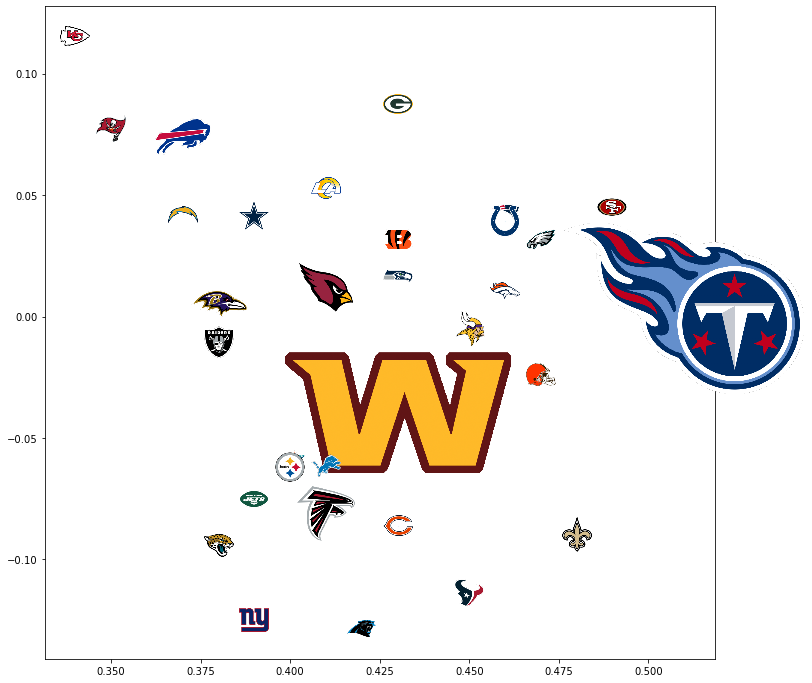

In [162]:
x = df3.rush_rate
y = df3.epa

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, df3.team_logo):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)